In [1]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt


from utils import (
    TicTacToe,
    get_action,
    learn_episode,
    evaluate_strategy_against_random, 
)

## Part 1

In [2]:
def train_Q(
    env, alpha=0.05, eps=0.05, gamma=1.0,
    num_tain_episodes=1_000_000, num_eval_episodes=10_000, eval_every_iters=5_000
):

    Q = defaultdict(lambda: np.zeros((N_ROWS, N_COLS)))
    
    avg_crosses_reward = []
    avg_naughts_reward = []


    for i in range(1, num_tain_episodes + 1):
        learn_episode(env, Q, alpha=alpha, eps=eps, gamma=gamma)
        
        if i % eval_every_iters == 0:
            avg_crosses_reward += [np.mean([
                evaluate_strategy_against_random(env, Q, player="crosses")
                for i in range(num_eval_episodes)
            ])]
            avg_naughts_reward += [-np.mean([
                evaluate_strategy_against_random(env, Q, player="naughts")
                for i in range(num_eval_episodes)
            ])]
            print(f"Iters = {i} crosses wins {avg_crosses_reward[-1]} naughts wins {avg_naughts_reward[-1]}")
    
    return avg_crosses_reward, avg_naughts_reward, Q

#### а) Реализуйте обычное (табличное) Q-обучение. Обучите стратегии крестиков и ноликов для доски 3х3.

In [3]:
N_ROWS, N_COLS, N_WIN = 3, 3, 3
env = TicTacToe(n_rows=N_ROWS, n_cols=N_COLS, n_win=N_WIN)

alpha = 0.01
epsilon = 0.5
gamma = 1.0
        
avg_crosses_rewards_3, avg_naughts_rewards_3, Q_3 = train_Q(
    env, alpha=alpha, eps=epsilon, gamma=gamma, num_tain_episodes=100_000
)

Iters = 5000 crosses wins 0.9186 naughts wins 0.9213
Iters = 10000 crosses wins 0.9547 naughts wins 0.9597
Iters = 15000 crosses wins 0.9625 naughts wins 0.958
Iters = 20000 crosses wins 0.9623 naughts wins 0.9579
Iters = 25000 crosses wins 0.9744 naughts wins 0.9742
Iters = 30000 crosses wins 0.9768 naughts wins 0.9758
Iters = 35000 crosses wins 0.9797 naughts wins 0.977
Iters = 40000 crosses wins 0.9787 naughts wins 0.978
Iters = 45000 crosses wins 0.9762 naughts wins 0.9799
Iters = 50000 crosses wins 0.9934 naughts wins 0.9918
Iters = 55000 crosses wins 0.9922 naughts wins 0.9906
Iters = 60000 crosses wins 0.9923 naughts wins 0.9931
Iters = 65000 crosses wins 0.9928 naughts wins 0.9918
Iters = 70000 crosses wins 0.9625 naughts wins 0.9662
Iters = 75000 crosses wins 0.9941 naughts wins 0.9937
Iters = 80000 crosses wins 0.9957 naughts wins 0.9945
Iters = 85000 crosses wins 0.9949 naughts wins 0.9947
Iters = 90000 crosses wins 0.9948 naughts wins 0.9944
Iters = 95000 crosses wins 0.994

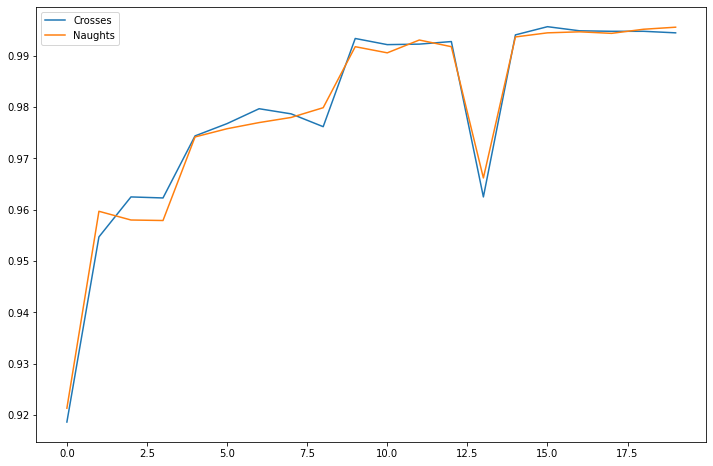

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(avg_crosses_rewards_3, label="Crosses")
plt.plot(avg_naughts_rewards_3, label="Naughts")
plt.legend()

#### б) Попробуйте обучить стратегии крестиков и ноликов для доски 4х4 и/или 5х5.

In [5]:
N_ROWS, N_COLS, N_WIN = 4, 4, 4
env = TicTacToe(n_rows=N_ROWS, n_cols=N_COLS, n_win=N_WIN)

avg_crosses_rewards_4, avg_naughts_rewards_4, Q_4 = train_Q(
    env, alpha=alpha, eps=epsilon, gamma=gamma,
    num_tain_episodes=200_000
)

Iters = 5000 crosses wins 0.2931 naughts wins 0.3197
Iters = 10000 crosses wins 0.2399 naughts wins 0.2355
Iters = 15000 crosses wins 0.1875 naughts wins 0.1928
Iters = 20000 crosses wins 0.2071 naughts wins 0.2102
Iters = 25000 crosses wins 0.2622 naughts wins 0.2576
Iters = 30000 crosses wins 0.2989 naughts wins 0.3051
Iters = 35000 crosses wins 0.3251 naughts wins 0.3323
Iters = 40000 crosses wins 0.3519 naughts wins 0.3492
Iters = 45000 crosses wins 0.3821 naughts wins 0.3767
Iters = 50000 crosses wins 0.3994 naughts wins 0.3962
Iters = 55000 crosses wins 0.4156 naughts wins 0.4197
Iters = 60000 crosses wins 0.4331 naughts wins 0.4315
Iters = 65000 crosses wins 0.4414 naughts wins 0.4482
Iters = 70000 crosses wins 0.4474 naughts wins 0.468
Iters = 75000 crosses wins 0.4565 naughts wins 0.4698
Iters = 80000 crosses wins 0.4972 naughts wins 0.4811
Iters = 85000 crosses wins 0.526 naughts wins 0.4965
Iters = 90000 crosses wins 0.5067 naughts wins 0.5142
Iters = 95000 crosses wins 0.53

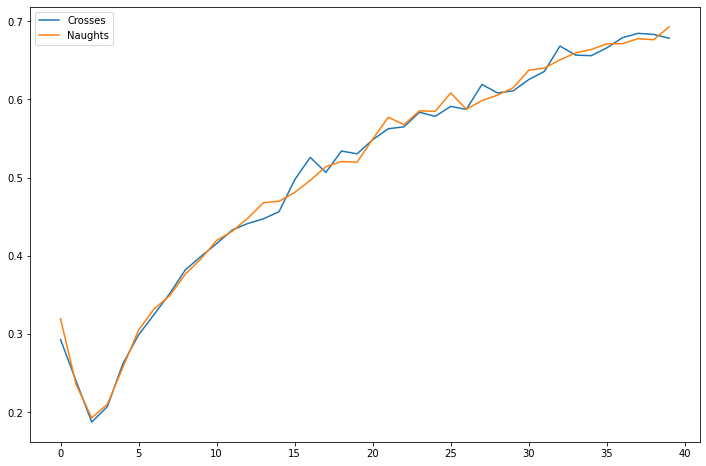

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(avg_crosses_rewards_4, label="Crosses")
plt.plot(avg_naughts_rewards_4, label="Naughts")
plt.legend()